# **Labor Market Analysis for Data Science Positions in Latin America**

## **Project Overview**  

This project investigates the labor market for data scientists across Latin America, focusing on salary structures, qualification requirements, and the key variables associated with earnings. Using exploratory data analysis (EDA) and multivariate regression techniques, the study examines patterns in wages, education levels, experience requirements, and the role of English proficiency across countries. Visualizations and statistical models are employed to interpret how these factors shape compensation across the region.

> **Disclaimer:** This dataset contains **simulated data** and should not be used for real-world decision-making purposes.

---
### **Input Data**  

This dataset includes the following variables:  

* `Country`: Country where the job posting is located.  
* `Location`: Specific location of the job.  
* `Title`: Job title.  
* `Company`: Name of the hiring company.  
* `Url`: URL of the job posting.  
* `CountryScore`: *Global Innovation Index* score of the country where the job is posted.  
* `English`: English language requirement for the job (1: required, 0: not required).  
* `EducationLevel`: Required years of professional education:  
  - 0: No formal education required  
  - 1: Basic technical training  
  - 2: Two years of technical training  
  - 3: Three years of technical training  
  - 4: Bachelor's degree  
  - 5: Professional degree  
  - 6: Postgraduate degree  
* `YearsExperience`: Required years of work experience.  
* `CompanyScore`: Workplace environment rating of the company.

---

## **Job Availability Across Countries**

Understanding how job postings are distributed across countries is a critical first step in the analysis. A bar chart and summary statistics are used to examine the number of observations per country, helping to identify imbalances in representation throughout the dataset.

Some countries may be overrepresented, potentially skewing comparisons and inflating regional trends, while others may be underrepresented, limiting the reliability of insights drawn from their data.

To flag underrepresented countries, a threshold is calculated based on the mean minus one standard deviation of the number of observations. Countries falling below this threshold may lack sufficient data for robust analysis. Recognizing these imbalances is essential to ensure fair interpretations.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('datos_t3.csv', delimiter=';')

# Display the first few rows of the dataset to understand its structure
df.head()

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037


In [2]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1000 non-null   object 
 1   Location         1000 non-null   object 
 2   Title            1000 non-null   object 
 3   Company          1000 non-null   object 
 4   Url              1000 non-null   object 
 5   CountryScore     515 non-null    float64
 6   English          1000 non-null   int64  
 7   EducationLevel   1000 non-null   int64  
 8   YearsExperience  1000 non-null   int64  
 9   CompanyScore     1000 non-null   float64
 10  SalaryUSD        1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


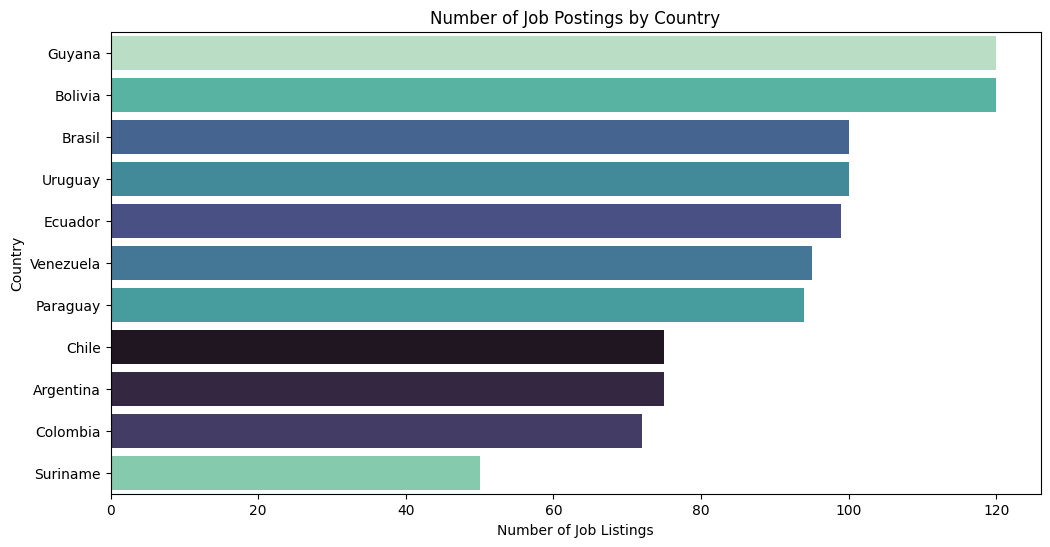

In [3]:
# Plot the distribution of job postings by country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index, hue='Country', legend=False, palette='mako')
plt.title('Number of Job Postings by Country')
plt.xlabel('Number of Job Listings')
plt.ylabel('Country')
plt.show()

In [4]:
# Identify countries with low data representation
country_counts = df['Country'].value_counts()

# Define a threshold for low data representation
# The threshold is set as the mean minus one standard deviation, considering both central tendency and dispersion.
# Countries significantly below this threshold may be underrepresented in the dataset.
threshold = country_counts.mean() - country_counts.std()

# Filter countries with low job posting counts
underrepresented_countries = country_counts[country_counts < threshold]
print("Countries with low representation in the dataset:")
print(underrepresented_countries)

Countries with low representation in the dataset:
Country
Suriname    50
Name: count, dtype: int64


In [5]:
# Generate a statistical summary by country
country_summary = df.groupby('Country').agg({
    'CountryScore': ['mean', 'std', 'min', 'max'],
    'SalaryUSD': ['mean', 'std', 'min', 'max'],
    'English': ['sum', 'count'],
    'EducationLevel': ['count'],
    'YearsExperience': ['mean', 'std', 'min', 'max']
}).reset_index()

# Round summary values for better readability
country_summary = country_summary.round(2)

# Display the summary table
country_summary

Country CountryScore                  SalaryUSD                        \
                      mean  std   min   max      mean       std  min    max   
0   Argentina         28.6  0.0  28.6  28.6   2064.71    557.09  564   3328   
1     Bolivia          NaN  NaN   NaN   NaN    979.18    224.63  407   1481   
2      Brasil          NaN  NaN   NaN   NaN   2251.63    579.18  933   3730   
3       Chile         34.0  0.0  34.0  34.0   2488.01    731.74  854   4144   
4    Colombia         29.2  0.0  29.2  29.2   2153.86    477.56  892   3145   
5     Ecuador         20.3  0.0  20.3  20.3   1439.79    389.15  432   2337   
6      Guyana          NaN  NaN   NaN   NaN   1368.87   4150.08   74  44900   
7    Paraguay         22.6  0.0  22.6  22.6   1673.98    454.02  684   2615   
8    Suriname          NaN  NaN   NaN   NaN   2672.14  11105.10   42  78600   
9     Uruguay         29.2  0.0  29.2  29.2   2147.76    503.50  881   3523   
10  Venezuela          NaN  NaN   NaN   NaN    740.92    193.26  366   1280   

   English       EducationLevel YearsExperience                
       sum count          count            mean   std min max  
0       31    75             75            7.04  1.71   2  11  
1       64   120            120            6.91  1.43   4  10  
2       43   100            100            7.13  1.38   4  11  
3       48    75             75            6.83  1.63   3  11  
4       33    72             72            7.10  1.45   4  10  
5       51    99             99            6.88  1.36   4  10  
6       60   120            120            7.19  1.46   4  11  
7       49    94             94            6.94  1.56   3  11  
8       29    50             50            6.96  1.55   4  10  
9       60   100            100            6.90  1.48   4  11  
10      51    95             95            6.93  1.39   3  10

In [6]:
# Analyze the distribution of education levels by country
education_distribution = df.groupby(['Country', 'EducationLevel']).size().unstack(fill_value=0)
education_distribution

EducationLevel,0,1,2,3,4,5,6
Country,,,,,,,
Argentina,3,3,16,28,19,5,1
Bolivia,0,10,24,49,32,5,0
Brasil,0,6,24,36,25,9,0
Chile,0,12,19,22,17,5,0
Colombia,0,2,21,26,19,3,1
Ecuador,3,6,31,31,19,9,0
Guyana,0,14,23,47,26,8,2
Paraguay,1,5,21,35,20,11,1
Suriname,0,3,8,22,16,1,0


In [7]:
# Create a pivot table showing the number of observations per variable and country
pivot_table = pd.pivot_table(
    df,
    index='Country',
    values=['CompanyScore', 'YearsExperience', 'CountryScore', 'SalaryUSD', 'English', 'EducationLevel'],
    aggfunc=['count']
)

# Display the pivot table
pivot_table

count                                                \
          CompanyScore CountryScore EducationLevel English SalaryUSD   
Country                                                                
Argentina           75           75             75      75        75   
Bolivia            120            0            120     120       120   
Brasil             100            0            100     100       100   
Chile               75           75             75      75        75   
Colombia            72           72             72      72        72   
Ecuador             99           99             99      99        99   
Guyana             120            0            120     120       120   
Paraguay            94           94             94      94        94   
Suriname            50            0             50      50        50   
Uruguay            100          100            100     100       100   
Venezuela           95            0             95      95        95   

                           
          YearsExperience  
Country                    
Argentina              75  
Bolivia               120  
Brasil                100  
Chile                  75  
Colombia               72  
Ecuador                99  
Guyana                120  
Paraguay               94  
Suriname               50  
Uruguay               100  
Venezuela              95

### **Findings and Interpretation**

The dataset shows an uneven distribution of job postings across countries, revealing notable imbalances in representation. Countries such as Bolivia and Guyana have a significantly higher number of observations, while Suriname has a much lower presence in the dataset.

Applying the threshold based on the mean minus one standard deviation, Suriname is the only country falling below this cutoff. This indicates that its data may not be sufficient to support meaningful comparative analysis, making it less representative within the overall dataset.

---

## **Salary Distribution and Anomalies**

Understanding salary distribution is essential for identifying patterns and potential inconsistencies in the labor market. This section explores how salaries vary across Latin American countries, highlights the presence of extreme values, and examines their implications for further analysis.


### **Visualizing Salary Distribution**

A histogram with a kernel density estimate (KDE) was used to examine the spread of salary levels. This visualization revealed clusters, central tendencies, and extreme values that may signal inconsistencies or exceptional cases.

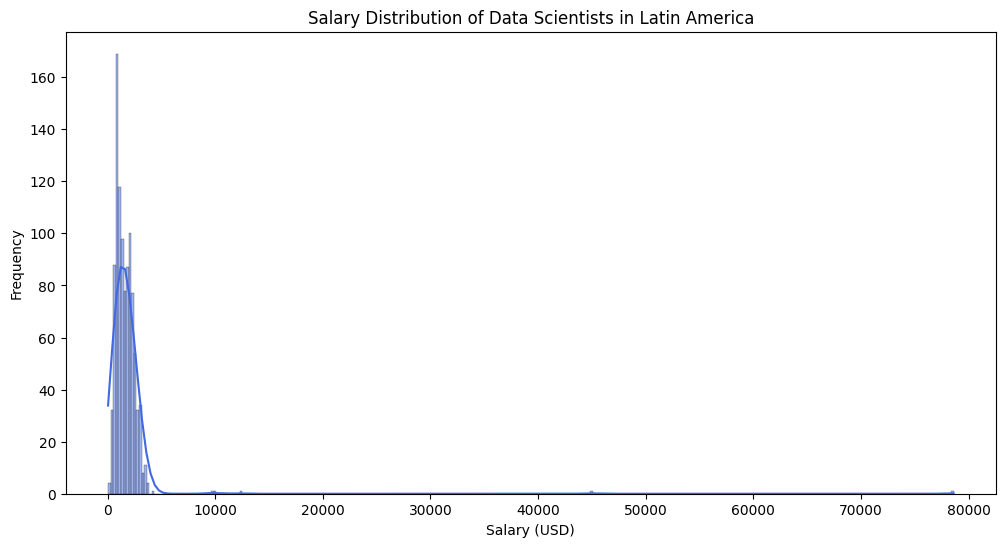

In [8]:
# Create histogram with KDE curve
plt.figure(figsize=(12, 6))
sns.histplot(df['SalaryUSD'], kde=True, color='royalblue')
plt.title("Salary Distribution of Data Scientists in Latin America")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

Additionally, a descriptive summary of salary statistics by country was created to highlight key salary characteristics, including the mean, median, and standard deviation. These summaries support comparisons across countries and help detect irregularities that could affect modeling accuracy.

In [9]:
# Generate descriptive salary statistics by country
salary_stats = df[['Country', 'SalaryUSD']].groupby('Country').describe().round(2)
salary_stats

SalaryUSD                                                      \
              count     mean       std    min      25%     50%      75%   
Country                                                                   
Argentina      75.0  2064.71    557.09  564.0  1690.00  2048.0  2509.00   
Bolivia       120.0   979.18    224.63  407.0   824.25   980.0  1105.00   
Brasil        100.0  2251.63    579.18  933.0  1811.00  2249.0  2688.00   
Chile          75.0  2488.01    731.74  854.0  2012.00  2499.0  2987.00   
Colombia       72.0  2153.86    477.56  892.0  1835.00  2149.0  2569.00   
Ecuador        99.0  1439.79    389.15  432.0  1151.00  1475.0  1672.00   
Guyana        120.0  1368.87   4150.08   74.0   779.50   920.0  1099.00   
Paraguay       94.0  1673.98    454.02  684.0  1328.00  1650.0  1971.00   
Suriname       50.0  2672.14  11105.10   42.0   644.50   786.0   928.25   
Uruguay       100.0  2147.76    503.50  881.0  1852.25  2124.0  2383.00   
Venezuela      95.0   740.92    193.26  366.0   604.00   732.0   896.00   

                    
               max  
Country             
Argentina   3328.0  
Bolivia     1481.0  
Brasil      3730.0  
Chile       4144.0  
Colombia    3145.0  
Ecuador     2337.0  
Guyana     44900.0  
Paraguay    2615.0  
Suriname   78600.0  
Uruguay     3523.0  
Venezuela   1280.0

### **Outlier Detection Using the Interquartile Range (IQR)**

Outliers were identified using the IQR method, which captures the central 50% of observations. Salaries that deviated substantially from the norm—particularly in Suriname, Guyana, and Uruguay—were flagged as potential anomalies.

In [10]:
# Compute Q1, Q3, and IQR for each country's SalaryUSD
q1 = df.groupby('Country')['SalaryUSD'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Country')['SalaryUSD'].transform(lambda x: x.quantile(0.75))
IQR = q3 - q1

# Define lower and upper bounds for each row
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Identify outliers using these bounds
outliers_by_country = df[(df['SalaryUSD'] < lower_bound) | (df['SalaryUSD'] > upper_bound)]
outliers_by_country

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
523,Uruguay,Uruguay,Data Scientist - Remote - Latin America,FullStack Labs,https://uy.linkedin.com/jobs/view/data-scienti...,29.2,1,4,11,4.348573,3264
527,Uruguay,"Montevideo, Montevideo, Uruguay",Backend Developer,LumiQualis,https://uy.linkedin.com/jobs/view/backend-deve...,29.2,0,1,5,3.798792,1037
534,Uruguay,"Montevideo, Montevideo, Uruguay",Software Engineer,McKinsey & Company,https://uy.linkedin.com/jobs/view/software-eng...,29.2,1,5,9,3.426792,3212
573,Uruguay,"Montevideo, Montevideo, Uruguay",Desarrollador RPA,FRIEDMAN,https://uy.linkedin.com/jobs/view/desarrollado...,29.2,0,6,11,6.515662,3264
583,Uruguay,"Montevideo, Montevideo, Uruguay",Remote Solutions Engineer (JavaScript) - LATAM,MonetizeMore,https://uy.linkedin.com/jobs/view/remote-solut...,29.2,0,1,4,5.812215,881
593,Uruguay,Uruguay,Data Scientist - Remote - Latin America,FullStack Labs,https://uy.linkedin.com/jobs/view/data-scienti...,29.2,1,5,11,4.260234,3523
594,Uruguay,"Montevideo, Montevideo, Uruguay",Data Scientist - Remote - Latin America,FullStack Labs,https://uy.linkedin.com/jobs/view/data-scienti...,29.2,1,5,9,2.182663,3212
832,Suriname,"Centrum, Paramaribo, Suriname",Full Stack Developer,Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/full-stack-d...,NaN,0,1,6,2.870235,42
835,Suriname,"Centrum, Paramaribo, Suriname",Database Reliability Engineer (Remote),Percona,https://sr.linkedin.com/jobs/view/database-rel...,NaN,1,3,6,7.340831,78600
838,Suriname,"Centrum, Paramaribo, Suriname",Frontend Developer (Angular),Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/frontend-dev...,NaN,1,4,8,8.187684,9801


### **Boxplot Analysis of Salary Distribution**

Boxplots by country illustrated median salaries, interquartile ranges, and outliers. These visualizations helped contextualize wage variability and inform decisions on data cleaning.

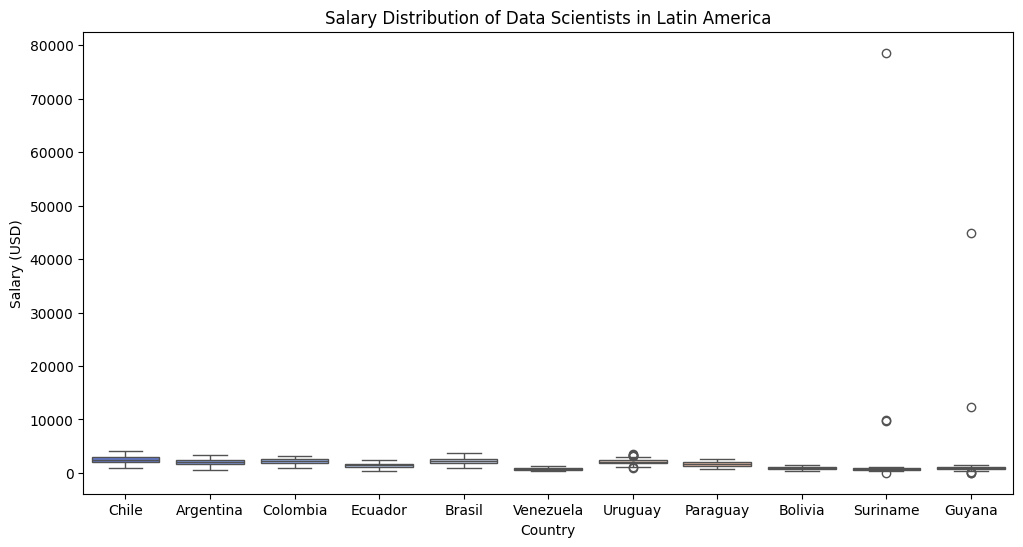

In [11]:
# Create a boxplot to visualize salary distribution by country
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='Country', y='SalaryUSD', hue='Country', palette="coolwarm", dodge=False)
plt.title('Salary Distribution of Data Scientists in Latin America')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')
plt.show()

### **Findings and Impact of Anomalies**

The presence of extreme salaries in a few countries suggested either data entry errors or market-specific wage anomalies. Removing these values was deemed the most appropriate strategy to enhance model reliability and reduce predictive bias.

In [12]:
# Calculate Q1, Q3, and IQR for each country's SalaryUSD
q1 = df.groupby('Country')['SalaryUSD'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Country')['SalaryUSD'].transform(lambda x: x.quantile(0.75))
IQR = q3 - q1

# Define lower and upper bounds per row
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['SalaryUSD'] >= lower_bound) & (df['SalaryUSD'] <= upper_bound)]

# Display a preview of the cleaned dataset
df_cleaned.head(2)

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195


In [13]:
# Check dataset structure after outlier removal
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          984 non-null    object 
 1   Location         984 non-null    object 
 2   Title            984 non-null    object 
 3   Company          984 non-null    object 
 4   Url              984 non-null    object 
 5   CountryScore     508 non-null    float64
 6   English          984 non-null    int64  
 7   EducationLevel   984 non-null    int64  
 8   YearsExperience  984 non-null    int64  
 9   CompanyScore     984 non-null    float64
 10  SalaryUSD        984 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 92.2+ KB


---

## **Salary Distribution Across Countries**

Understanding how salaries vary across countries provides important insight into labor market conditions in the region. This section uses statistical summaries and boxplot visualizations to examine differences in average salaries, income dispersion, and the presence of outliers. These tools allow for a comparative analysis of wage structures across Latin American countries.

### **Visualization of Salary Dispersion**

A boxplot was generated to assess salary dispersion across countries. This visualization captures key distributional features, including:

* Median salary (central line within each box)
* Interquartile range (IQR) (range covering the middle 50% of salaries)
* Outliers (points lying beyond 1.5x the IQR)
* Mean salary (shown as a green reference line)

This approach provides a clear overview of salary variability within and between countries.

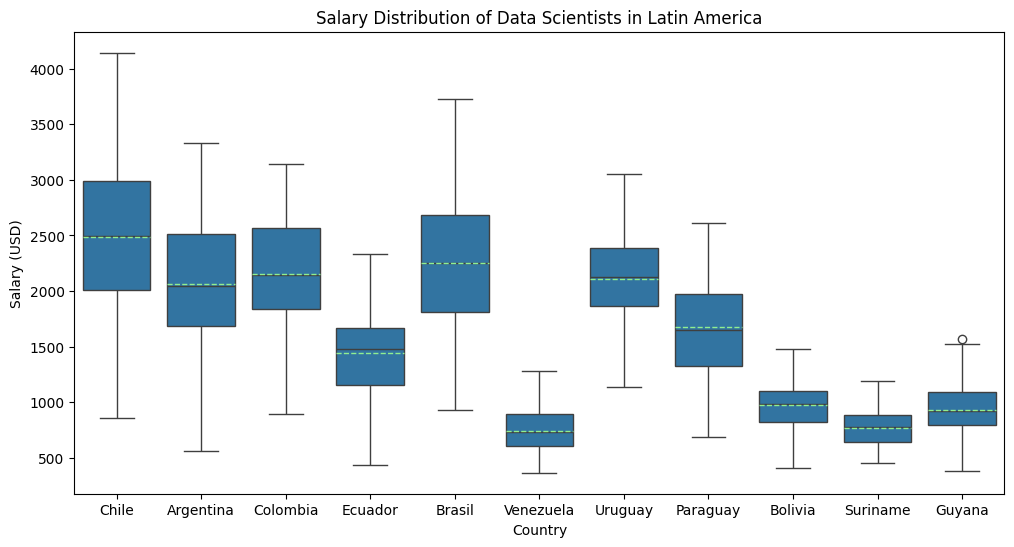

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Country', y='SalaryUSD', showmeans=True, meanline=True, meanprops={"color": "lightgreen", "linewidth": 1})
plt.title("Salary Distribution of Data Scientists in Latin America")
plt.xlabel("Country")
plt.ylabel("Salary (USD)")
plt.show()

### **Mean Salaries Across Countries**

To compare average earnings, descriptive statistics were computed by country. Countries were ranked according to their mean salaries to identify the highest- and lowest-paying labor markets for data scientists.

In [15]:
# Compute summary statistics for mean salaries by country
mean_salary = df_cleaned.groupby('Country')['SalaryUSD'].describe().round(2).sort_values(by='mean', ascending=False)
mean_salary

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Chile,75.0,2488.01,731.74,854.0,2012.00,2499.0,2987.0,4144.0
Brasil,100.0,2251.63,579.18,933.0,1811.00,2249.0,2688.0,3730.0
Colombia,72.0,2153.86,477.56,892.0,1835.00,2149.0,2569.0,3145.0
Uruguay,93.0,2111.65,410.32,1140.0,1865.00,2124.0,2383.0,3057.0
Argentina,75.0,2064.71,557.09,564.0,1690.00,2048.0,2509.0,3328.0
Paraguay,94.0,1673.98,454.02,684.0,1328.00,1650.0,1971.0,2615.0
Ecuador,99.0,1439.79,389.15,432.0,1151.00,1475.0,1672.0,2337.0
Bolivia,120.0,979.18,224.63,407.0,824.25,980.0,1105.0,1481.0
Guyana,115.0,928.24,248.08,382.0,796.50,920.0,1088.0,1570.0


### **Salary Dispersion Analysis**

Standard deviation was used to evaluate income variability within countries. A higher standard deviation reflects greater wage dispersion, which may signal labor market segmentation or inequality. A lower value indicates a more homogeneous salary structure.

In [16]:
# Compute salary dispersion (standard deviation) by country
dispersion_salary = df_cleaned.groupby('Country')['SalaryUSD'].describe().round(2).sort_values(by='std', ascending=False)
dispersion_salary

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Chile,75.0,2488.01,731.74,854.0,2012.00,2499.0,2987.0,4144.0
Brasil,100.0,2251.63,579.18,933.0,1811.00,2249.0,2688.0,3730.0
Argentina,75.0,2064.71,557.09,564.0,1690.00,2048.0,2509.0,3328.0
Colombia,72.0,2153.86,477.56,892.0,1835.00,2149.0,2569.0,3145.0
Paraguay,94.0,1673.98,454.02,684.0,1328.00,1650.0,1971.0,2615.0
Uruguay,93.0,2111.65,410.32,1140.0,1865.00,2124.0,2383.0,3057.0
Ecuador,99.0,1439.79,389.15,432.0,1151.00,1475.0,1672.0,2337.0
Guyana,115.0,928.24,248.08,382.0,796.50,920.0,1088.0,1570.0
Bolivia,120.0,979.18,224.63,407.0,824.25,980.0,1105.0,1481.0


### **Findings and Interpretation**

The results reveal marked differences in salary structures across Latin America:

* **Chile**, **Brazil**, and **Colombia** record the highest average salaries, reflecting stronger labor demand and greater compensation for data science roles. However, these countries also exhibit substantial salary dispersion, suggesting the coexistence of both high-paying and lower-tier positions—an indication of broader wage gaps and a stratified labor market.
* **Venezuela**, **Suriname**, and **Guyana**, in contrast, report the lowest average salaries. Their lower levels of salary dispersion suggest more uniform pay structures. While this points to consistency in earnings, it may also reflect a lack of access to higher-paying opportunities and a narrower salary spectrum.
* **Chile**, **Brazil**, and **Argentina** show the greatest salary variability, highlighting wage inequality within these countries. Conversely, Suriname, Venezuela, and Guyana demonstrate narrower distributions, indicating more stable but lower compensation environments.

These findings highlight a structural trade-off across the region: countries with greater earning potential also exhibit higher income inequality, while those with more predictable salary structures tend to offer fewer high-wage opportunities.

---
## **Impact of English Proficiency on Salaries**
Language proficiency, particularly in English, is a key factor influencing salary levels across Latin America. A statistical summary and boxplot analysis were conducted to examine the relationship between English proficiency and salary variations in different countries.

###**Statistical Analysis**

A comparative analysis was performed by grouping salaries based on English proficiency (Yes or No) within each country. The summary statistics indicate that in most economies, speaking English is associated with higher earnings, both in terms of average salaries and minimum and maximum salary levels.

In [17]:
# Summary statistics: Grouping by English proficiency and country
summary_english = df_cleaned.groupby(['Country', 'English'])['SalaryUSD'].describe().unstack().round(2)
summary_english

count           mean              std             min          \
English       0     1        0        1       0       1       0       1   
Country                                                                   
Argentina  44.0  31.0  1893.66  2307.48  504.42  544.99   564.0  1127.0   
Bolivia    56.0  64.0   872.71  1072.33  196.03  207.06   407.0   645.0   
Brasil     57.0  43.0  1963.74  2633.26  451.56  507.18   933.0  1646.0   
Chile      27.0  48.0  1928.48  2802.75  564.34  621.16   854.0  1646.0   
Colombia   39.0  33.0  1977.54  2362.24  494.25  365.04   892.0  1835.0   
Ecuador    48.0  51.0  1234.25  1633.24  302.99  363.03   432.0   792.0   
Guyana     57.0  58.0   784.49  1069.52  199.48  207.42   382.0   606.0   
Paraguay   45.0  49.0  1431.49  1896.67  372.53  407.95   684.0   885.0   
Suriname   20.0  26.0   681.25   833.42  137.46  169.36   457.0   494.0   
Uruguay    37.0  56.0  1899.11  2252.07  374.74  373.16  1140.0  1555.0   
Venezuela  44.0  51.0   633.82   833.31  156.77  174.00   366.0   439.0   

               25%             50%              75%              max          
English          0       1       0       1        0        1       0       1  
Country                                                                       
Argentina  1575.25  1997.0  1844.0  2458.0  2253.00  2688.00  2918.0  3328.0  
Bolivia     777.00   908.0   932.0  1099.0  1015.75  1219.00  1314.0  1481.0  
Brasil     1646.00  2304.0  1975.0  2524.0  2414.00  2962.00  2853.0  3730.0  
Chile      1524.50  2317.0  2012.0  2865.0  2286.00  3200.25  2865.0  4144.0  
Colombia   1573.00  2045.0  1888.0  2254.0  2228.50  2673.00  3145.0  3145.0  
Ecuador    1007.00  1421.0  1241.0  1654.0  1475.00  1888.00  1978.0  2337.0  
Guyana      651.00   920.0   808.0  1032.0   920.00  1228.25  1234.0  1570.0  
Paraguay   1127.00  1609.0  1368.0  1851.0  1650.00  2172.00  2414.0  2615.0  
Suriname    590.25   732.0   658.0   813.5   777.25   946.50   914.0  1189.0  
Uruguay    1710.00  1969.0  1866.0  2228.0  2124.00  2539.00  3005.0  3057.0  
Venezuela   512.00   732.0   613.0   841.0   713.00   933.00  1006.0  1280.0

To gain a deeper understanding, a pivot table was generated to highlight key salary metrics (mean, standard deviation, min, max) based on English proficiency.

In [18]:
# Pivot table for key salary metrics by English proficiency
pivot_english = pd.pivot_table(
    df_cleaned, index='Country', columns='English', values='SalaryUSD',
    aggfunc=['count', 'mean', 'std', 'min', 'max']
).round(2).sort_values(by=('mean', 1), ascending=False)
pivot_english

count         mean              std           min         max      
English       0   1        0        1       0       1     0     1     0     1
Country                                                                      
Chile        27  48  1928.48  2802.75  564.34  621.16   854  1646  2865  4144
Brasil       57  43  1963.74  2633.26  451.56  507.18   933  1646  2853  3730
Colombia     39  33  1977.54  2362.24  494.25  365.04   892  1835  3145  3145
Argentina    44  31  1893.66  2307.48  504.42  544.99   564  1127  2918  3328
Uruguay      37  56  1899.11  2252.07  374.74  373.16  1140  1555  3005  3057
Paraguay     45  49  1431.49  1896.67  372.53  407.95   684   885  2414  2615
Ecuador      48  51  1234.25  1633.24  302.99  363.03   432   792  1978  2337
Bolivia      56  64   872.71  1072.33  196.03  207.06   407   645  1314  1481
Guyana       57  58   784.49  1069.52  199.48  207.42   382   606  1234  1570
Suriname     20  26   681.25   833.42  137.46  169.36   457   494   914  1189
Venezuela    44  51   633.82   833.31  156.77  174.00   366   439  1006  1280

###**Visualization of Salary Differences**

A boxplot was created to visually compare salary distributions between professionals who speak English and those who do not, across different countries.

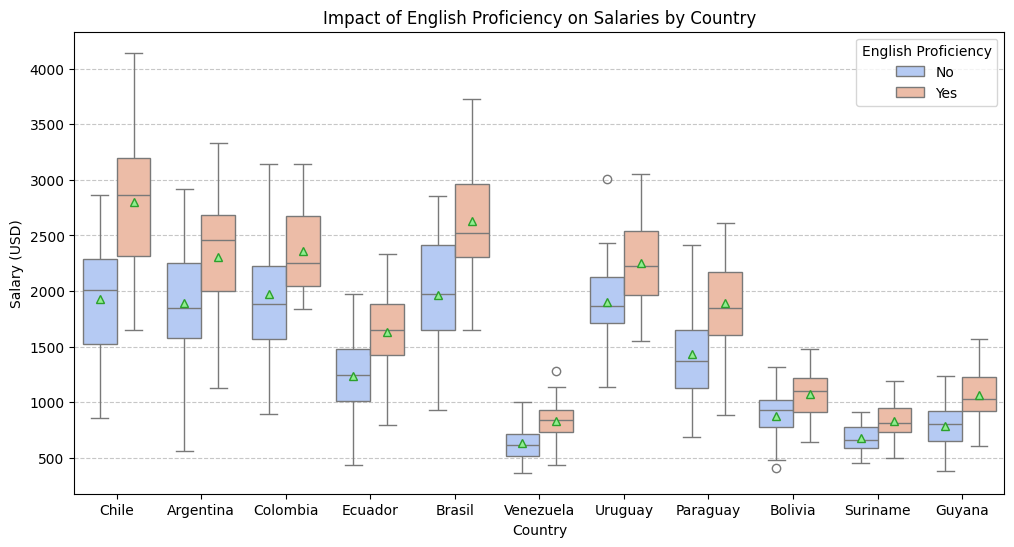

In [19]:
# Boxplot: Relationship between English proficiency and salary by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Country', y='SalaryUSD', hue='English', showmeans=True,
            meanprops={"markerfacecolor": "lightgreen"}, palette="coolwarm")
plt.title("Impact of English Proficiency on Salaries by Country")
plt.xlabel("Country")
plt.ylabel("Salary (USD)")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No', 'Yes'], title="English Proficiency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###**Findings and Interpretation**

The analysis reveals that English proficiency has a clear positive impact on salaries in most Latin American countries. In particular, Chile, Brazil, and Colombia show a notable increase in average salaries for professionals who speak English. This trend suggests that English speakers have access to better-paying opportunities in these labor markets. In contrast, the effect of English proficiency is less significant in countries such as Suriname and Venezuela, where the difference in earnings between English and non-English speakers is minimal. The boxplot visualization supports these findings, showing wider salary distributions for English speakers in higher-income countries. Additionally, minimum salary levels are consistently higher for English-speaking professionals across all countries analyzed, further indicating a salary advantage. Maximum salaries also tend to be higher among English speakers, with the exception of Colombia, where the highest salary levels are equal regardless of language skills.

These findings suggest that English proficiency is a key differentiator in the Latin American job market, particularly in countries with stronger economies and higher-paying roles. The broader salary dispersion observed among English speakers points to greater career mobility, allowing professionals to access both entry-level and high-salary positions. This reinforces the idea that language skills, especially English, play a significant role in salary growth and serve as an important asset for career advancement in the region.

---

## **Education and Experience Requirements by Country**

To explore education and experience requirements for data science roles in the region, a summary table and boxplots were generated for the variables EducationLevel and YearsExperience by country. These indicators provide insight into the typical qualifications employers are seeking.

In [20]:
# Summary: Average education and experience per country
avg_requirements = df_cleaned.groupby('Country')[['EducationLevel', 'YearsExperience']].mean().round(2)
avg_requirements

,EducationLevel,YearsExperience
Country,,
Argentina,3.01,7.04
Bolivia,2.98,6.91
Brasil,3.07,7.13
Chile,2.79,6.83
Colombia,3.04,7.10
Ecuador,2.85,6.88
Guyana,2.96,7.18
Paraguay,3.12,6.94
Suriname,3.09,6.96


In [21]:
# Count of observations (for imbalance check)
pivot_table_exp = df_cleaned.groupby('Country')[['EducationLevel', 'YearsExperience']].count()
pivot_table_exp

,EducationLevel,YearsExperience
Country,,
Argentina,75,75
Bolivia,120,120
Brasil,100,100
Chile,75,75
Colombia,72,72
Ecuador,99,99
Guyana,115,115
Paraguay,94,94
Suriname,46,46


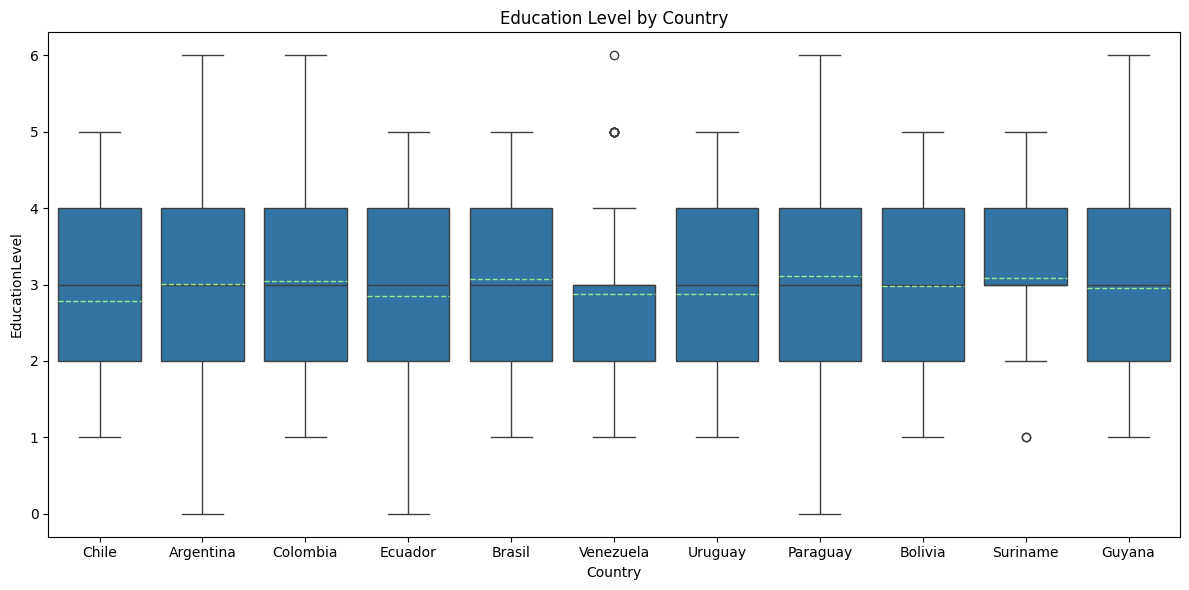

In [22]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned, x='Country', y='EducationLevel', showmeans=True, meanline=True, meanprops={"color": "lightgreen"})
plt.title('Education Level by Country')
plt.tight_layout()
plt.show()

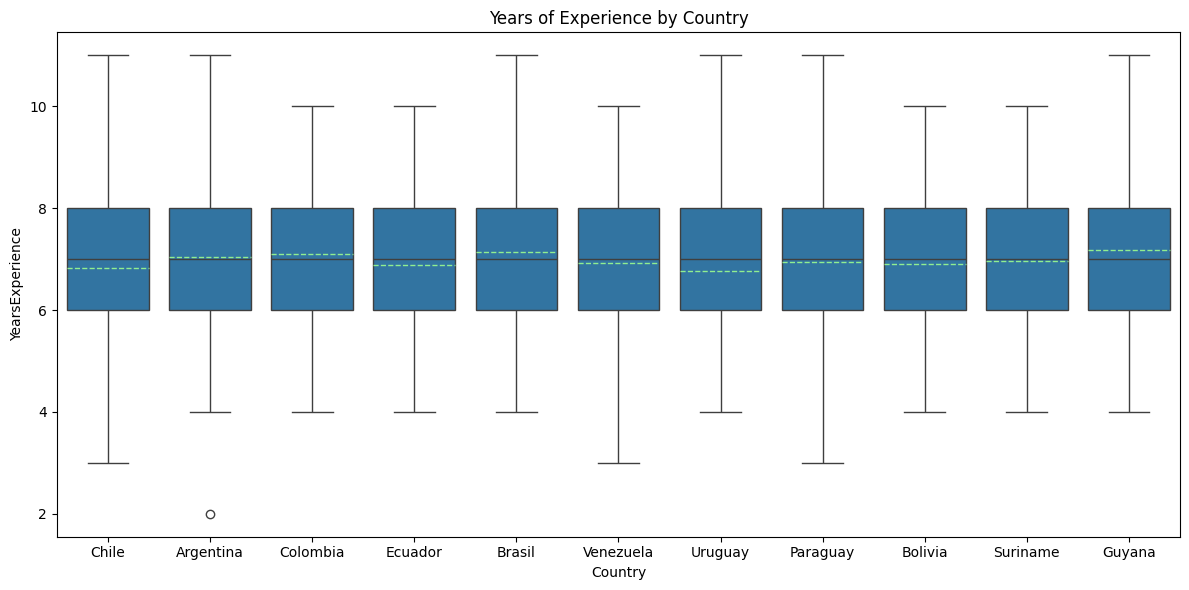

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned, x='Country', y='YearsExperience', showmeans=True, meanline=True, meanprops={"color": "lightgreen"})
plt.title('Years of Experience by Country')
plt.tight_layout()
plt.show()

### **Findings and Interpretation**

The average education level required across countries is relatively consistent, generally equivalent to three years of technical training. Paraguay (3.12) and Suriname (3.09) stand out for requiring slightly higher levels of education, while Chile has the lowest average (2.79), though the differences across countries are minimal.

In terms of work experience, requirements also show a narrow range, with Guyana (7.18 years) and Brazil (7.13 years) demanding the most, and Uruguay (6.77 years) the least. These variations suggest that the regional labor market for data scientists has relatively aligned expectations, with only slight country-specific differences.

The boxplots confirm this observation by displaying a tight clustering of both education and experience levels across countries. There is limited dispersion and few outliers, indicating that most roles demand similar qualifications.

Overall, the results suggest a high degree of similarity in the qualifications expected across South America, with no major deviations in either education or experience requirements. Minor differences reflect the specific dynamics of local markets but do not indicate significant inconsistencies in hiring standards.

---

## **Correlation Analysis of Key Factors**

To identify the most influential variables in salary determination, a correlation matrix and heatmap were generated. These tools help evaluate the strength and direction of relationships between salary (SalaryUSD) and other numeric variables, including education level, experience, company rating, and the innovation score of the country. Understanding these correlations is essential for selecting the most relevant predictors for salary estimation models.


In [24]:
# Select numerical variables from the dataset
var_num = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute and round the correlation matrix
correlation_matrix = var_num.corr().round(2)
correlation_matrix

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
CountryScore,1.00,0.05,-0.03,-0.00,-0.02,0.57
English,0.05,1.00,0.01,0.00,-0.02,0.25
EducationLevel,-0.03,0.01,1.00,0.70,0.02,0.44
YearsExperience,-0.00,0.00,0.70,1.00,0.01,0.42
CompanyScore,-0.02,-0.02,0.02,0.01,1.00,-0.02
SalaryUSD,0.57,0.25,0.44,0.42,-0.02,1.00


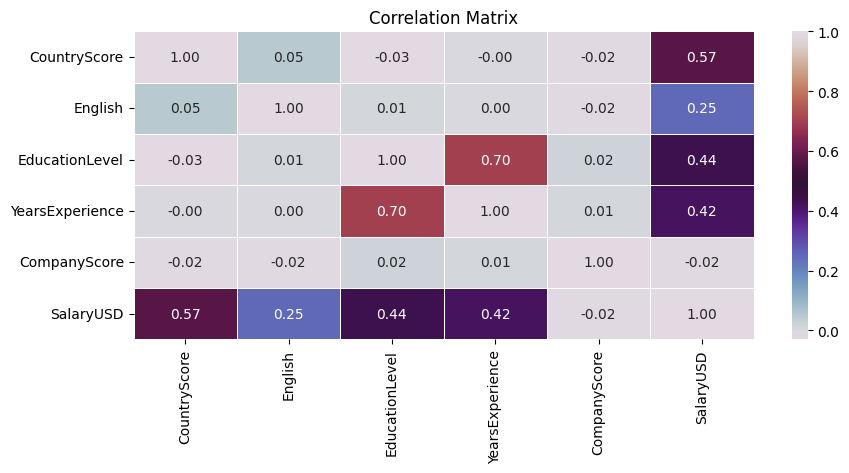

In [25]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Findings and Interpretation**

The correlation matrix indicates that **CountryScore (0.57)**, **EducationLevel (0.44)**, and **YearsExperience (0.42)** are the variables most strongly associated with salary levels. These findings suggest that macro-level factors—such as a country’s innovation capacity—along with individual qualifications and work experience, play a meaningful role in shaping compensation outcomes across the region.

By contrast, **English proficiency (0.25)** shows only a weak correlation with salary, while **CompanyScore (-0.02)** appears to have no systematic relationship. These results imply that, although language skills may provide some advantage, they are not the primary drivers of salary variation in this dataset. Furthermore, company-level workplace ratings do not seem to significantly influence compensation, at least not in a consistent or measurable way.

Given these results, CountryScore, EducationLevel, and YearsExperience emerge as the most appropriate predictors to be considered in the design of a salary estimation model.

---

## **Visual Exploration of Salary Determinants**

To deepen the analysis of factors associated with salary levels across South America, a series of scatterplots were constructed using pairwise comparisons between SalaryUSD and key explanatory variables. These visualizations provide complementary evidence to the correlation matrix by illustrating the nature of these relationships, including potential nonlinear patterns and country-specific heterogeneity.

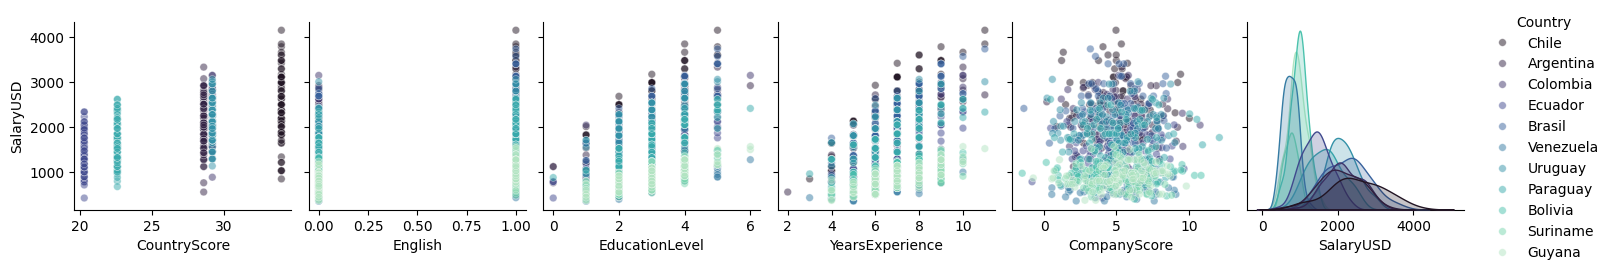

In [26]:
sns.pairplot(
    data=df_cleaned,
    y_vars='SalaryUSD',
    hue='Country',
    palette='mako',
    plot_kws={'alpha': 0.5, 's': 30},
    diag_kind='kde'
)
plt.show()

### **Findings and Interpretation**

* **CountryScore and SalaryUSD:** A positive association is observed between a country’s innovation index and salary levels. Countries with higher CountryScore values tend to report higher salaries, suggesting that national-level innovation and economic development are important structural factors influencing labor market outcomes. This relationship is consistent with the correlation coefficient of 0.57.

* **English and SalaryUSD:** Although English proficiency is represented as a binary variable, individuals identified as proficient (value = 1) tend to earn higher salaries. While the magnitude of the correlation is moderate (0.25), the pattern indicates that English proficiency remains a relevant factor in salary differentiation, particularly in more globally integrated markets.

* **EducationLevel and SalaryUSD:** There is a discernible upward trend in salaries as the required education level increases. This is reflected in a correlation coefficient of 0.44, supporting the notion that human capital investments continue to play a significant role in wage formation across the region.

* **YearsExperience and SalaryUSD:** The data show a positive relationship between years of required experience and salary levels, consistent with expectations from labor economics. The correlation of 0.42 reinforces this finding, suggesting that experience remains a robust predictor of remuneration.

* **CompanyScore and SalaryUSD:** No clear pattern is visible between company ratings and salary levels. This is further confirmed by a negligible correlation coefficient (-0.02), implying that firm-level environment ratings do not significantly influence salary differentials in the dataset analyzed.

### **Cross-Country Variation**
The scatterplots also reveal that the strength and direction of these relationships vary across countries. This variation likely reflects underlying differences in labor market structures, institutional contexts, and economic development levels. Such heterogeneity highlights the importance of incorporating country-specific effects when developing predictive models and interpreting regional labor market dynamics. A one-size-fits-all model may obscure important nuances in salary formation mechanisms at the national level.

---

## **Building a Multivariate Regression Model for Salary Prediction**

To develop a robust model for salary estimation, a multiple linear regression was conducted using the statsmodels library. The choice of predictor variables was guided by prior statistical and visual analyses, including the correlation matrix and boxplots, to ensure inclusion of the most relevant explanatory factors. Model performance was evaluated through standard regression diagnostics, including the R² value, statistical significance of predictors, and checks for potential multicollinearity and residual autocorrelation.

To assess potential regional heterogeneity, the analysis was further refined by estimating a country-specific model using data from Ecuador. This allowed for a direct comparison between a regional model and a localized one, informing whether country-level customization is needed to improve model accuracy.

### **Selection of Predictor Variables**

Based on previous correlation and visual analysis, the following variables were selected for inclusion in the regression model:

* **CountryScore:** Moderately correlated with SalaryUSD (0.57). Higher innovation index scores at the national level are associated with higher salaries, highlighting the importance of structural country-level factors.
* **EducationLevel:** Correlation of 0.44, suggesting that higher educational attainment is positively linked with increased salary levels.
* **YearsExperience:** With a correlation of 0.42, this variable captures the influence of accumulated professional experience on salary outcomes.
* **English:** Although it has a weaker correlation (0.25), prior graphical analysis supports its inclusion due to its observed effect on wages, particularly in more globally connected labor markets.

In [27]:
# Define dependent and independent variables
x = df_cleaned[['CountryScore', 'EducationLevel', 'YearsExperience', 'English']]
y = df_cleaned['SalaryUSD']
X = sm.add_constant(x)

# Remove missing values
X = X.dropna()
y = y[X.index]

# Fit the Ordinary Least Squares (OLS) regression model
resultados = sm.OLS(y, X).fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     5224.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:52:36   Log-Likelihood:                -3026.6
No. Observations:                 508   AIC:                             6063.
Df Residuals:                     503   BIC:                             6084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1997.1325     31.618    -63.164      0.000   -2059.253   -1935.012
CountryScore       73.8499      0.902     81.880      0.000      72.078      75.622
EducationLevel    228.9318      5.374     42.603      0.000     218.374     239.489
YearsExperience   150.7926      3.950     38.171      0.000     143.031     158.554
English           473.5765      8.373     56.557      0.000     457.125     490.028
==============================================================================
Omnibus:                       26.442   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.157
Skew:                          -0.033   Prob(JB):                     2.38e-18
Kurtosis:                       4.957   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model Results**
The regional model achieves an R² of 0.976, indicating that 97.6% of the variation in salaries is explained by the selected predictors. The F-statistic and its p-value confirm the model's overall significance, while the Durbin-Watson statistic (2.030) suggests no evidence of autocorrelation in the residuals.

#### **Interpretation of Coefficients**

* **CountryScore:** A positive and statistically significant coefficient of 73.84 indicates that innovation index levels contribute meaningfully to salary differences across countries.
* **EducationLevel:** With a coefficient of 228.93, this is one of the most influential predictors. Higher levels of education are strongly associated with higher salaries.
* **YearsExperience:** The model estimates an increase of 150.79 USD in salary for each additional year of experience, with high statistical significance.
* **English:** This variable exhibits the largest coefficient (473.57), suggesting that English proficiency is a major determinant of salary, potentially reflecting access to more competitive or international job opportunities.

#### **Conclusion**

The regression results confirm that education, experience, English proficiency, and country-level innovation capacity are key determinants of salary levels for data science professionals in South America. These findings underscore the importance of both individual qualifications and structural factors in shaping labor market outcomes across the region.

## **Country-Specific Analysis: Ecuador**



### **Correlation Analysis**

To assess whether salary determinants differ significantly across countries, the correlation analysis was replicated for Ecuador. The coefficients show notable variation compared to the regional averages, reflecting specific characteristics of the Ecuadorian labor market.

In [28]:
# Filter the dataset for Ecuador
country = 'Ecuador'
base_country = df_cleaned[df_cleaned['Country'] == country].reset_index()
base_country.drop('index', axis=1, inplace=True)

# Compute the correlation matrix
correlation_matrix_country = base_country[['SalaryUSD', 'EducationLevel', 'YearsExperience', 'English', 'CompanyScore']].corr()

# Display the correlation matrix
correlation_matrix_country

,SalaryUSD,EducationLevel,YearsExperience,English,CompanyScore
SalaryUSD,1.000000,0.833313,0.818754,0.515011,0.057654
EducationLevel,0.833313,1.000000,0.734464,0.029926,0.115058
YearsExperience,0.818754,0.734464,1.000000,0.092012,0.015004
English,0.515011,0.029926,0.092012,1.000000,-0.022246
CompanyScore,0.057654,0.115058,0.015004,-0.022246,1.000000


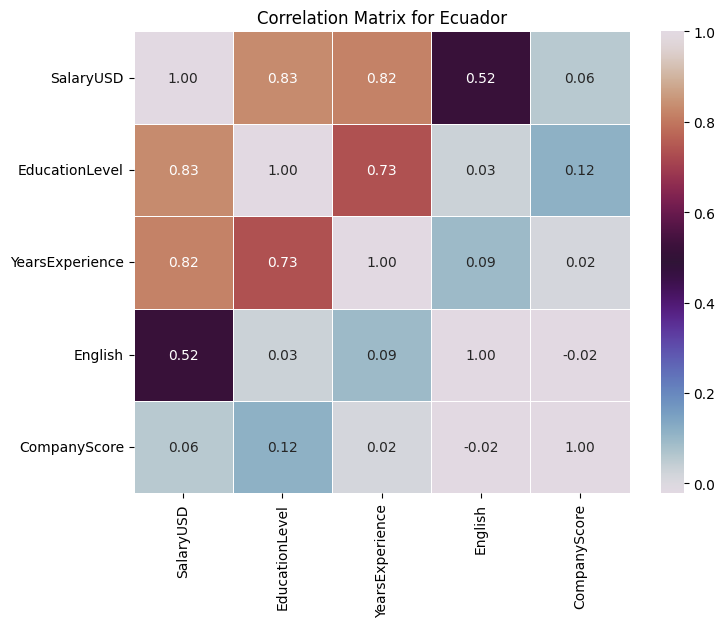

In [29]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_country, annot=True, cmap='twilight', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation Matrix for {country}')
plt.show()

* **CountryScore:** This variable was excluded from Ecuador’s correlation matrix because it is constant across all observations for the country. Since its standard deviation is zero, the Pearson correlation coefficient is undefined. In the regional model, CountryScore showed a moderate positive correlation with salaries (0.57), reflecting its structural importance. However, in country-level models where the variable is invariant, its explanatory power cannot be assessed via correlation.

* **EducationLevel and SalaryUSD:** The correlation between education level and salary in Ecuador is 0.83—substantially higher than the regional figure of 0.44. This indicates that educational attainment is a particularly strong determinant of salary outcomes in Ecuador’s data science labor market.

* **YearsExperience and SalaryUSD:** A similarly strong relationship is observed between work experience and salary, with a correlation of 0.82 in Ecuador compared to 0.42 in the regional dataset. This suggests that employers in Ecuador place significant value on prior professional experience when determining compensation levels.

* **English and SalaryUSD:** The correlation between English proficiency and salary is 0.52 in Ecuador, double the regional estimate (0.25). While not as strong as education or experience, this result reinforces the relevance of English proficiency in accessing higher-paying opportunities.

* **CompanyScore and SalaryUSD:** The correlation between company workplace ratings and salary remains very weak (0.06), consistent with the near-zero correlation observed at the regional level (-0.02). This confirms that company ratings do not play a major role in shaping wage outcomes in either context.

### **Country-Level Regression Model**
To further assess how well salary levels can be explained by key predictors at the country level, a multiple linear regression model was estimated using Ecuador’s data.

In [30]:
# Define independent and dependent variables
X_country = base_country[['CountryScore', 'EducationLevel', 'YearsExperience', 'English']]
y_country = base_country['SalaryUSD']
X_country = sm.add_constant(X_country)

# Check for missing values
print(y_country.isnull().sum())
print(X_country.isnull().sum())

# Fit the regression model
results_country = sm.OLS(y_country, X_country).fit()
results_country.summary()


0
CountryScore       0
EducationLevel     0
YearsExperience    0
English            0
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.555e+07
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.00e-296
Time:                        01:52:37   Log-Likelihood:                -18.721
No. Observations:                  99   AIC:                             45.44
Df Residuals:                      95   BIC:                             55.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
CountryScore        0.0321      0.008      3.936      0.000       0.016       0.048
EducationLevel    179.7527      0.038   4737.278      0.000     179.677     179.828
YearsExperience   107.8584      0.033   3296.199      0.000     107.793     107.923
English           359.4644      0.060   5954.965      0.000     359.345     359.584
==============================================================================
Omnibus:                       47.647   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.715
Skew:                           0.013   Prob(JB):                       0.0348
Kurtosis:                       1.724   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model Results and Interpretation**

The regression model for Ecuador yields an R^2 of 1.000, indicating a perfect fit to the data. This contrasts slightly with the regional model, which had an R^2 of 0.976—still strong, but leaving room for unexplained variation. The Durbin-Watson statistic is 1.941, indicating no evidence of significant autocorrelation among residuals. The F-statistic confirms the model’s overall statistical significance.

Coefficient analysis reveals some key differences from the regional model:

* **CountryScore:** Although statistically significant, the coefficient is very small (0.0321) compared to the regional estimate of 73.84. This suggests that innovation capacity, while important in cross-country comparisons, plays a minimal role within Ecuador, where the variable is almost constant.
* **EducationLevel:** The estimated coefficient (179.75) remains positive and significant, though lower than in the regional model (228.93). This implies that education continues to drive salary differences within Ecuador, albeit with slightly less weight.
* **YearsExperience:** With a coefficient of 107.85, work experience also contributes positively to salary levels, though the effect is smaller than the 150.79 estimated regionally.
* **English:** English proficiency emerges as the most influential variable in the Ecuadorian model, with a coefficient of 359.46. This reinforces previous observations that English proficiency significantly enhances earning potential, even more so in a localized context.

#### **Conclusion**

The country-specific model for Ecuador highlights the nuanced role of different salary determinants at the national level. While education, experience, and English proficiency remain critical factors, their relative influence diverges from regional estimates. Notably, the strong explanatory power of English proficiency suggests that language skills may offer a key pathway to higher earnings in Ecuador’s data science labor market. These results underscore the importance of contextualizing salary modeling within country-specific frameworks to improve accuracy and policy relevance.